Import libraries

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

Create path

In [2]:
proj_root = os.path.abspath("..")
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

In [3]:
RAW_DATA = os.path.join("..", "data", "raw")
PROCESSED_DATA = os.path.join("..", "data", "processed")

In [4]:
train_path = os.path.join(RAW_DATA, "train.csv")
test_path = os.path.join(RAW_DATA, "test.csv")

Import datasets:

In [5]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

Get an overview

In [6]:
df_train.shape, df_test.shape

((911, 12), (911, 11))

In [7]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [22]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,911.0,528.327113,305.072794,0.000000,266.000000,531.000000,795.500000,1049.000000
meals_served,911.0,375.405049,502.812717,100.000000,211.000000,306.000000,407.000000,4730.000000
kitchen_staff,911.0,11.900110,4.285153,5.000000,8.000000,12.000000,15.000000,19.000000
temperature_C,911.0,22.189280,8.922389,-10.372207,15.684585,22.115040,28.804294,60.000000
humidity_percent,911.0,60.761313,17.330821,30.121111,46.017835,61.633960,75.787910,89.982828
day_of_week,911.0,3.014270,2.009542,0.000000,1.000000,3.000000,5.000000,6.000000
special_event,911.0,0.085620,0.279956,0.000000,0.000000,0.000000,0.000000,1.000000
past_waste_kg,911.0,27.015691,12.774223,5.008394,16.091383,26.854109,38.149878,49.803703
food_waste_kg,911.0,44.842691,27.934366,10.819048,32.887912,41.146930,50.046681,274.328783


In [9]:
df_test.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 78.4+ KB


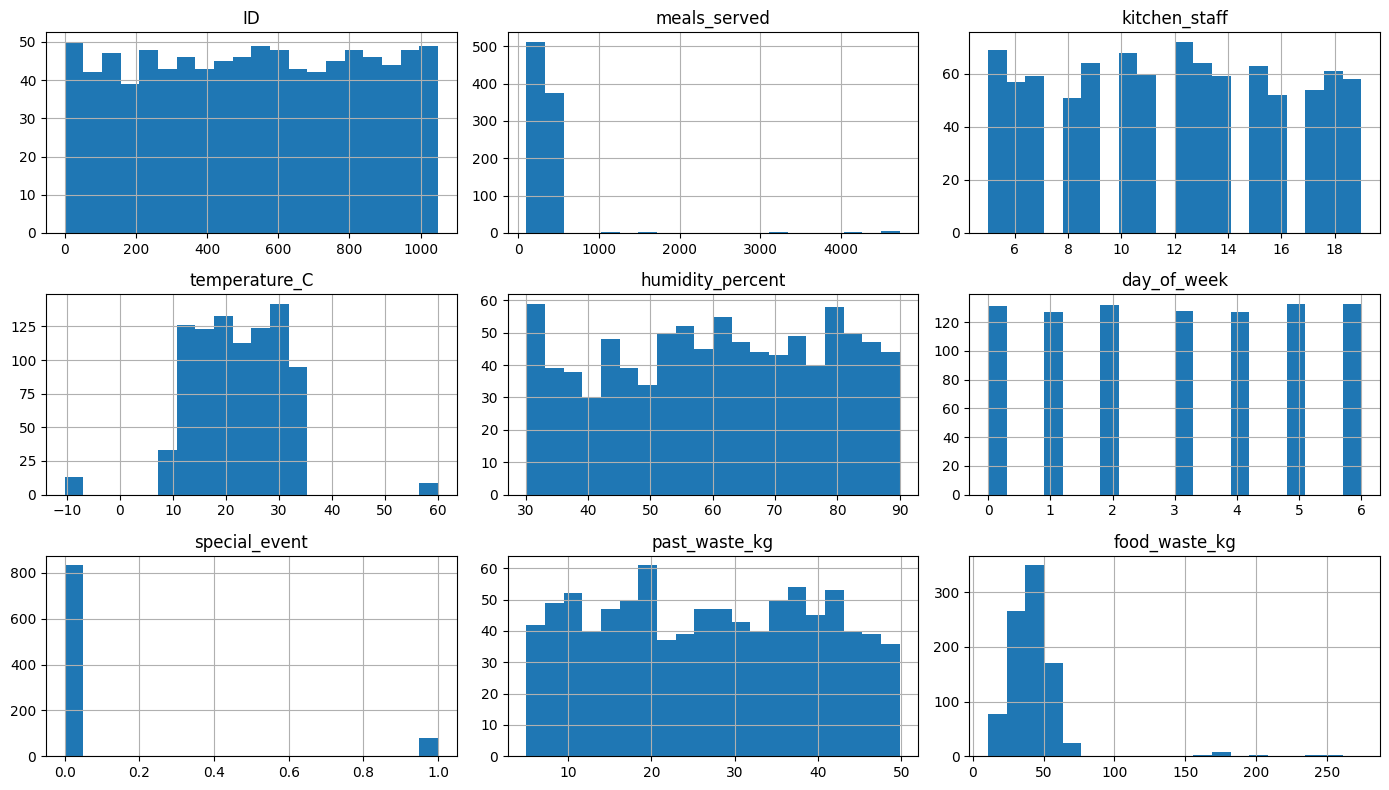

In [26]:
# Visual check of numeric distributions
df_train.hist(figsize=(14, 8), bins=20)
plt.tight_layout()
plt.show()

We are going to combine train & test dataframes for uniform Preprocessing.

In [11]:
df_test['food_waste_kg'] = np.nan

In [12]:
df = pd.concat([df_train, df_test], ignore_index = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1822 non-null   int64  
 3   kitchen_staff     1822 non-null   int64  
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1822 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   int64  
 8   past_waste_kg     1822 non-null   float64
 9   staff_experience  1494 non-null   object 
 10  waste_category    1822 non-null   object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 170.9+ KB


Check for messing values

In [15]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
missing

food_waste_kg       911
staff_experience    328
dtype: int64

Check for duplicates

In [21]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

Unique counts per column

In [24]:
df.nunique()

ID                  911
date                867
meals_served        373
kitchen_staff        15
temperature_C       892
humidity_percent    867
day_of_week           7
special_event         2
past_waste_kg       867
staff_experience      4
waste_category        5
food_waste_kg       867
dtype: int64

Value counts for categorical

In [25]:
cat_cols = df.select_dtypes(include = "object").columns
for col in cat_cols:
    print(f"\n {col}:\n", df[col].value_counts(dropna = False))


 date:
 date
2022-01-28    4
2022-01-13    4
2022-02-01    4
2022-01-11    4
2022-01-05    4
             ..
2024-05-21    2
2022-03-29    2
2022-11-27    2
2023-04-12    2
2024-05-10    2
Name: count, Length: 867, dtype: int64

 staff_experience:
 staff_experience
Beginner        382
EXPERT          372
Intermediate    372
intermediate    368
NaN             328
Name: count, dtype: int64

 waste_category:
 waste_category
MEAT          420
dairy         360
Vegetables    352
GRAINS        352
MeAt          338
Name: count, dtype: int64


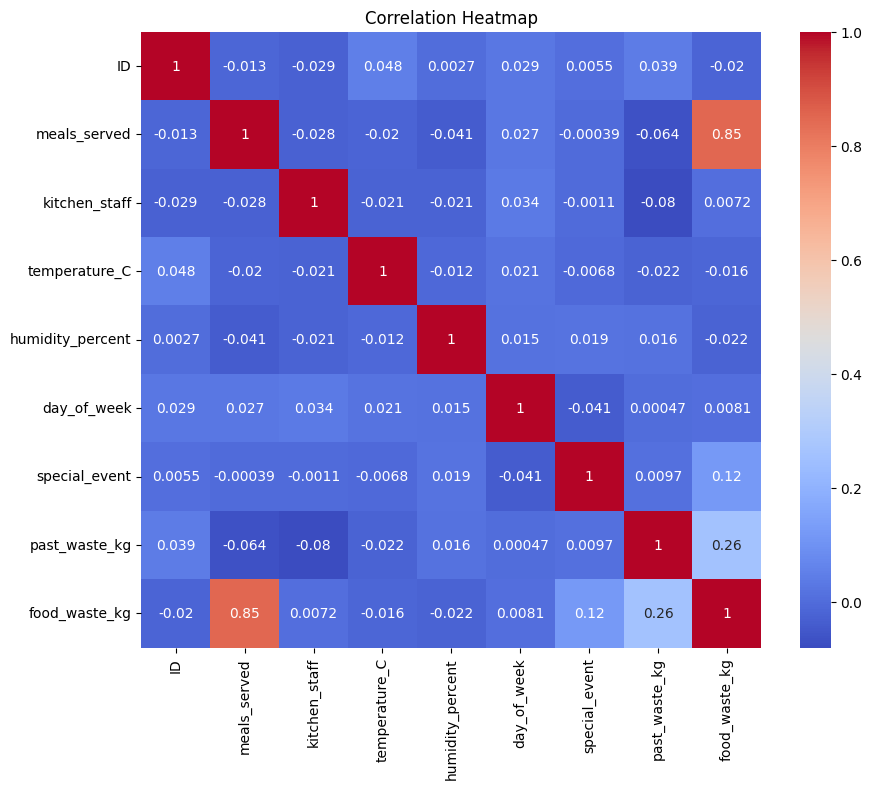

In [28]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
